In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA

In [2]:
# Import the dataset 

df = pd.read_csv('gurgaon_properties_post_feature_selection_v2.csv').drop(columns=['store room','floor_category','balcony'])

In [3]:
df.head()

,property_type,sector,price,bedRoom,bathroom,agePossession,built_up_area,servant room,furnishing_type,luxury_category
0,flat,sector 36,0.82,3.0,2.0,New Property,850.0,0.0,0.0,Low
1,flat,sector 89,0.95,2.0,2.0,New Property,1226.0,1.0,0.0,Low
2,flat,sohna road,0.32,2.0,2.0,New Property,1000.0,0.0,0.0,Low
3,flat,sector 92,1.60,3.0,4.0,Relatively New,1615.0,1.0,1.0,High
4,flat,sector 102,0.48,2.0,2.0,Relatively New,582.0,0.0,0.0,High


In [4]:
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

In [5]:
# Numerical = bedRoom, bathroom, built_up_area, servant room
# Ordinal = property_type, furnishing_type, luxury_category 
# OHE = sector, agePossession

In [6]:
# Sorting the 5 categories to 3 categories

df['agePossession'] = df['agePossession'].replace(
    {
        'Relatively New':'new',
        'Moderately Old':'old',
        'New Property' : 'new',
        'Old Property' : 'old',
        'Under Construction' : 'under construction'
    }
)

In [7]:
df.head()

,property_type,sector,price,bedRoom,bathroom,agePossession,built_up_area,servant room,furnishing_type,luxury_category
0,flat,sector 36,0.82,3.0,2.0,new,850.0,0.0,0.0,Low
1,flat,sector 89,0.95,2.0,2.0,new,1226.0,1.0,0.0,Low
2,flat,sohna road,0.32,2.0,2.0,new,1000.0,0.0,0.0,Low
3,flat,sector 92,1.60,3.0,4.0,new,1615.0,1.0,1.0,High
4,flat,sector 102,0.48,2.0,2.0,new,582.0,0.0,0.0,High


In [8]:
# assign categories of property type in to number

df['property_type'] = df['property_type'].replace({'flat':0,'house':1})

In [9]:
df.head()

,property_type,sector,price,bedRoom,bathroom,agePossession,built_up_area,servant room,furnishing_type,luxury_category
0,0,sector 36,0.82,3.0,2.0,new,850.0,0.0,0.0,Low
1,0,sector 89,0.95,2.0,2.0,new,1226.0,1.0,0.0,Low
2,0,sohna road,0.32,2.0,2.0,new,1000.0,0.0,0.0,Low
3,0,sector 92,1.60,3.0,4.0,new,1615.0,1.0,1.0,High
4,0,sector 102,0.48,2.0,2.0,new,582.0,0.0,0.0,High


In [10]:
# assign categories or transformation of luxury_category in to number


df['luxury_category'] = df['luxury_category'].replace({'Low':0,'Medium':1,'High':2})

In [11]:
df.head()

,property_type,sector,price,bedRoom,bathroom,agePossession,built_up_area,servant room,furnishing_type,luxury_category
0,0,sector 36,0.82,3.0,2.0,new,850.0,0.0,0.0,0
1,0,sector 89,0.95,2.0,2.0,new,1226.0,1.0,0.0,0
2,0,sohna road,0.32,2.0,2.0,new,1000.0,0.0,0.0,0
3,0,sector 92,1.60,3.0,4.0,new,1615.0,1.0,1.0,2
4,0,sector 102,0.48,2.0,2.0,new,582.0,0.0,0.0,2


In [12]:
# for getting the column name use pandas get dummies function
# when used encoding technique(onehotencoding) of scikitlearn they remove column name

new_df = pd.get_dummies(df,columns=['sector','agePossession'],drop_first=True)

In [13]:
# split the data in to dependent variable and independent variable

X = new_df.drop(columns=['price'])
y = new_df['price']

In [14]:
# use log transformation becoz data is not distributed properly

y_log = np.log1p(y)

In [15]:
y_log

0       0.598837
1       0.667829
2       0.277632
3       0.955511
4       0.392042
          ...   
3549    0.314811
3550    1.945910
3551    0.470004
3552    2.803360
3553    1.022451
Name: price, Length: 3554, dtype: float64

In [16]:
# scale the data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [18]:
X_scaled

,property_type,bedRoom,bathroom,built_up_area,servant room,furnishing_type,luxury_category,sector_gwal pahari,sector_manesar,sector_sector 1,...,sector_sector 9,sector_sector 90,sector_sector 91,sector_sector 92,sector_sector 93,sector_sector 95,sector_sector 99,sector_sohna road,agePossession_old,agePossession_under construction
0,-0.517180,-0.074329,-0.874300,-0.831662,-0.747968,-0.668281,-0.984642,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
1,-0.517180,-0.877269,-0.874300,-0.522517,1.336956,-0.668281,-0.984642,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
2,-0.517180,-0.877269,-0.874300,-0.708333,-0.747968,-0.668281,-0.984642,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,4.561105,-0.602271,-0.290738
3,-0.517180,-0.074329,0.505173,-0.202684,1.336956,1.037949,1.866207,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,5.877074,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
4,-0.517180,-0.877269,-0.874300,-1.052010,-0.747968,-0.668281,1.866207,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,-0.517180,-0.877269,-0.874300,-1.093119,-0.747968,-0.668281,0.440783,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
3550,1.933563,1.531549,1.194909,3.590095,1.336956,-0.668281,1.866207,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,-0.602271,-0.290738
3551,-0.517180,-1.680208,-1.564036,-0.983768,-0.747968,1.037949,0.440783,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,1.660383,-0.290738
3552,1.933563,1.531549,1.884645,2.983317,1.336956,-0.668281,0.440783,-0.071348,-0.093805,-0.041123,...,-0.078923,-0.160267,-0.069328,-0.170153,-0.050386,-0.125375,-0.109357,-0.219245,1.660383,-0.290738


In [19]:
# train the model using linear regression

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), X_scaled, y_log, cv=kfold, scoring='r2')

In [20]:
scores.mean(),scores.std()

(0.8512613057405425, 0.016992929105286273)

In [21]:


lr = LinearRegression()
ridge = Ridge(alpha=0.0001)

In [22]:
lr.fit(X_scaled,y_log)

LinearRegression()

In [23]:
ridge.fit(X_scaled,y_log)

Ridge(alpha=0.0001)

In [24]:
# make the dataframe

coef_df = pd.DataFrame(ridge.coef_.reshape(1,112),columns=X.columns).stack().reset_index().drop(columns=['level_0']).rename(columns={'level_1':'feature',0:'coef'})

In [25]:
# Inference

coef_df

,feature,coef
0,property_type,0.120165
1,bedRoom,0.054002
2,bathroom,0.065119
3,built_up_area,0.210638
4,servant room,0.050946
...,...,...
107,sector_sector 95,-0.025222
108,sector_sector 99,-0.010312
109,sector_sohna road,-0.029515
110,agePossession_old,-0.007900


In [26]:
# 1. Import necessary libraries
import statsmodels.api as sm

# 2. Add a constant to X
X_with_const = sm.add_constant(X_scaled)

# 3. Fit the model
model = sm.OLS(y_log, X_with_const).fit()

# 4. Obtain summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     196.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:07:00   Log-Likelihood:                 588.22
No. Observations:                3554   AIC:                            -950.4
Df Residuals:                    3441   BIC:                            -252.6
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [27]:
y_log.std()

0.5579613263072782

In [28]:
X_scaled['bedRoom'].std()

1.0001407162464122

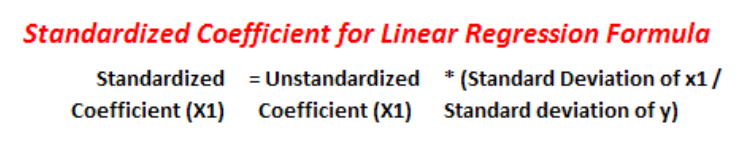

#### here for us x1= bedRoom  and std of y is log(y)
#### (a) = (b) * (σb/σp)
#### (b) = (a) * (σp/σb)

In [29]:
0.054 * (0.5579/1.2455)

0.024188358089120832

#### for builtup area 

In [30]:
0.21 * (0.557/1)

0.11697

In [31]:
np.expm1(0.030)

0.030454533953516858

In [32]:
2.4726962617564903e-05 * 100

0.0024726962617564905